In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(
    '/kaggle/input/energy/household_power_consumption.txt',
    sep=';',
    parse_dates={'Datetime': ['Date', 'Time']},  # Combine Date and Time
    infer_datetime_format=True,
    na_values='?',      # Handle missing values marked as '?'
    low_memory=False    # Avoid dtype warnings
)

# Show the first few rows
df.head()


/tmp/ipykernel_31/1514135078.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipykernel_31/1514135078.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipykernel_31/1514135078.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Drop rows with any missing values
df = df.dropna()

# Convert all columns (except Datetime) to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col])

# Set datetime as index for time-series operations
df.set_index('Datetime', inplace=True)

# Sort the data chronologically
df = df.sort_index()

# Preview the cleaned data
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


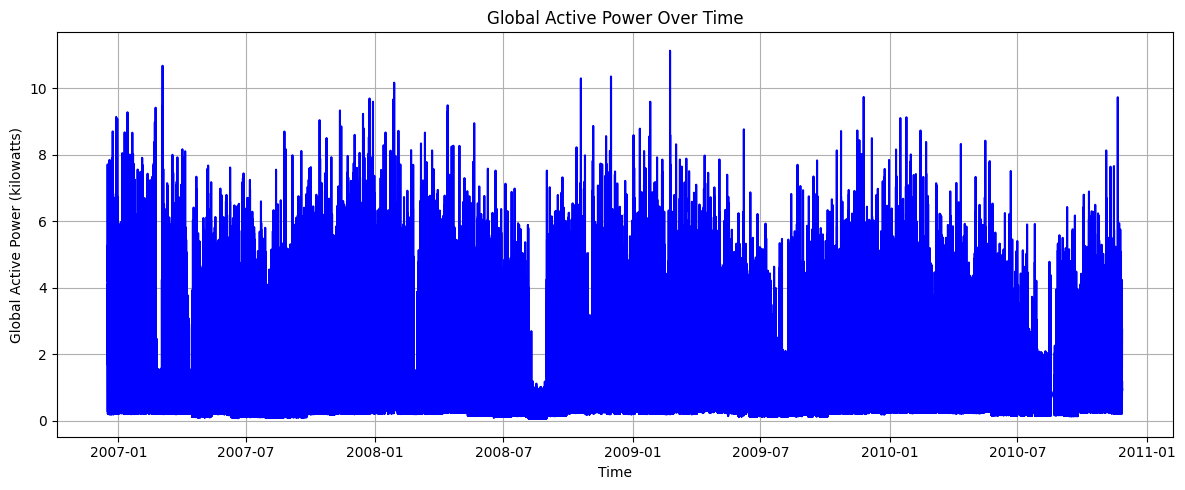

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Global_active_power'], color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/2521654523.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


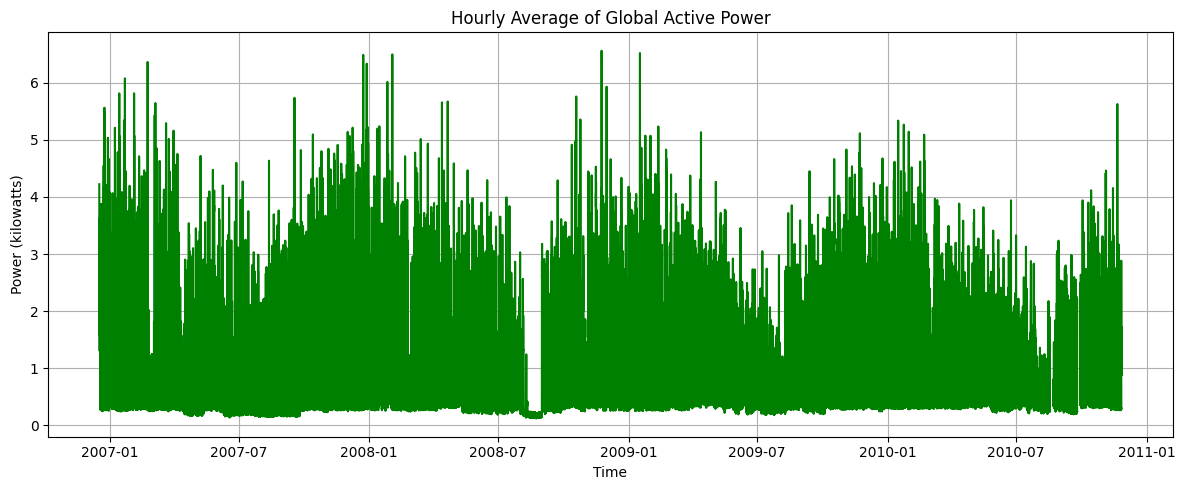

In [6]:
# Resample to hourly average to smooth the curve
df_hourly = df['Global_active_power'].resample('H').mean()

plt.figure(figsize=(12, 5))
plt.plot(df_hourly.index, df_hourly, color='green')
plt.title('Hourly Average of Global Active Power')
plt.xlabel('Time')
plt.ylabel('Power (kilowatts)')
plt.grid(True)
plt.tight_layout()
plt.show()


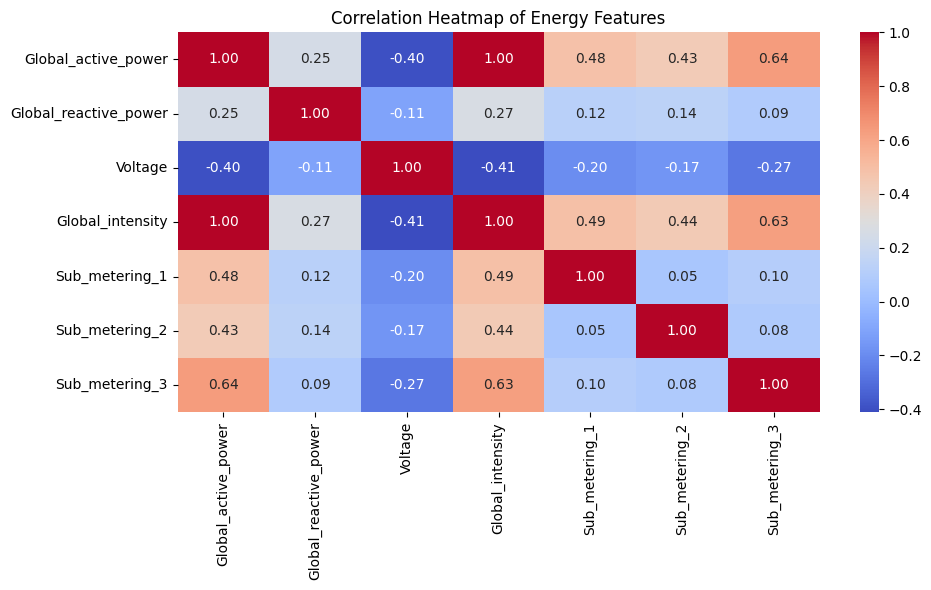

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Energy Features')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# We'll use hourly data
data = df['Global_active_power'].resample('H').mean().dropna()

# Create lag features (previous 24 hours)
df_lag = pd.DataFrame()
df_lag['target'] = data

# Create lags: 1 to 24 hours (1 day)
for i in range(1, 25):
    df_lag[f'lag_{i}'] = data.shift(i)

# Drop missing values from shifting
df_lag = df_lag.dropna()

# Show sample
df_lag.head()


/tmp/ipykernel_31/1535836815.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = df['Global_active_power'].resample('H').mean().dropna()


,target,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.406767,3.326033,2.985400,2.092633,1.660767,1.915867,2.471000,3.628900,2.549067,1.890567,...,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,4.222889
2006-12-17 18:00:00,3.697100,3.406767,3.326033,2.985400,2.092633,1.660767,1.915867,2.471000,3.628900,2.549067,...,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200
2006-12-17 19:00:00,2.908400,3.697100,3.406767,3.326033,2.985400,2.092633,1.660767,1.915867,2.471000,3.628900,...,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233
2006-12-17 20:00:00,3.361500,2.908400,3.697100,3.406767,3.326033,2.985400,2.092633,1.660767,1.915867,2.471000,...,1.996733,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567
2006-12-17 21:00:00,3.040767,3.361500,2.908400,3.697100,3.406767,3.326033,2.985400,2.092633,1.660767,1.915867,...,1.303300,1.996733,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467


In [15]:
# Reset index so XGBoost can use it easily
df_lag = df_lag.reset_index()

# Split chronologically (80% train, 20% test)
split_idx = int(len(df_lag) * 0.8)
train_xgb = df_lag.iloc[:split_idx]
test_xgb = df_lag.iloc[split_idx:]

# Separate features and target
X_train = train_xgb.drop(columns=['Datetime', 'target'])
y_train = train_xgb['target']
X_test = test_xgb.drop(columns=['Datetime', 'target'])
y_test = test_xgb['target']


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost MAE: {mae_xgb:.4f}")


XGBoost MSE: 0.3231
XGBoost MAE: 0.4325


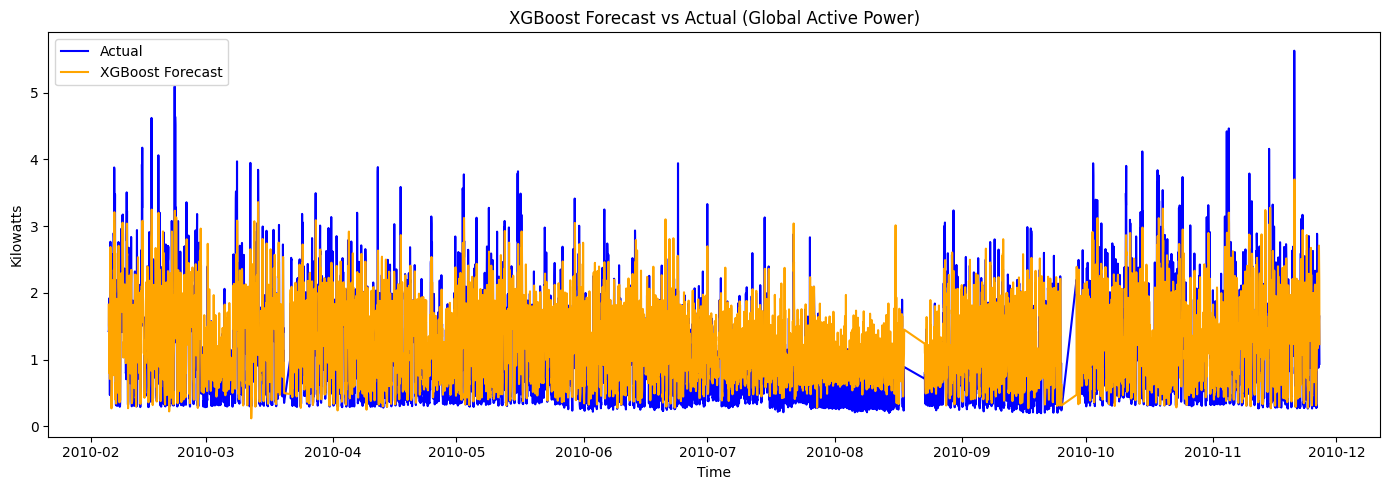

In [17]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(test_xgb['Datetime'], y_test.values, label='Actual', color='blue')
plt.plot(test_xgb['Datetime'], y_pred_xgb, label='XGBoost Forecast', color='orange')
plt.title('XGBoost Forecast vs Actual (Global Active Power)')
plt.xlabel('Time')
plt.ylabel('Kilowatts')
plt.legend()
plt.tight_layout()
plt.show()

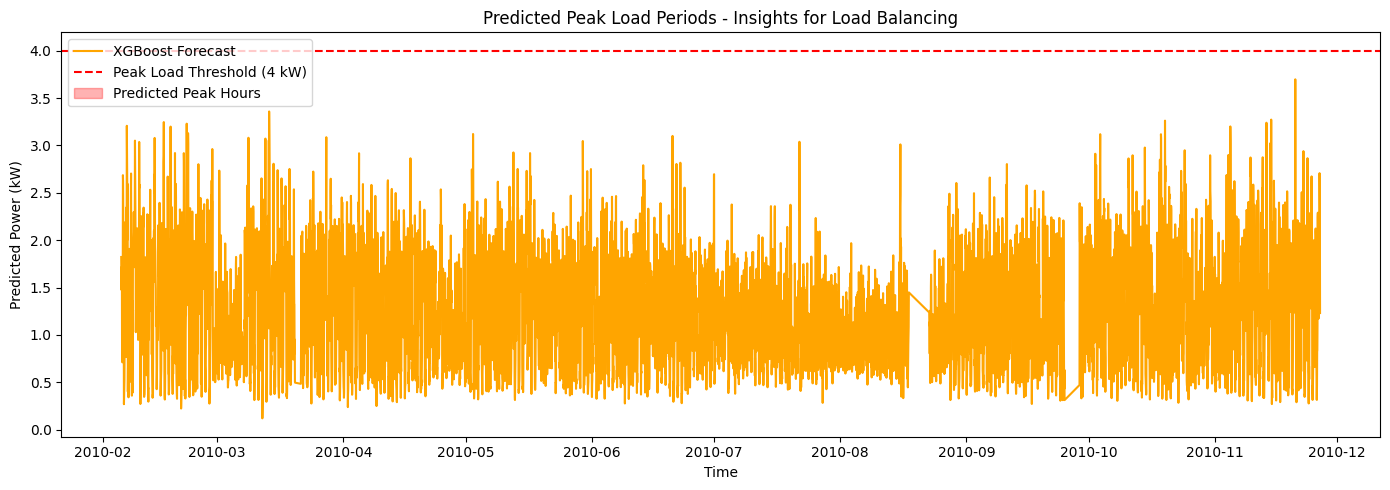

In [20]:
'''By identifying periods with predicted
consumption > 4 kW, we can trigger
smart device control strategies or alert users to reduce or shift consumption.'''

import matplotlib.pyplot as plt

# Set threshold for peak load (e.g., 4 kW)
threshold = 4.0

# Add peak indicator
peak_hours = (y_pred_xgb > threshold)

# Plot predicted vs actual with peak indicators
plt.figure(figsize=(14, 5))
plt.plot(test_xgb['Datetime'], y_pred_xgb, label='XGBoost Forecast', color='orange')
plt.axhline(y=threshold, color='red', linestyle='--', label='Peak Load Threshold (4 kW)')
plt.fill_between(test_xgb['Datetime'], y_pred_xgb, threshold, where=peak_hours, color='red', alpha=0.3, label='Predicted Peak Hours')
plt.xlabel('Time')
plt.ylabel('Predicted Power (kW)')
plt.title('Predicted Peak Load Periods - Insights for Load Balancing')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/1713299965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_xgb['hour'] = test_xgb['Datetime'].dt.hour
/tmp/ipykernel_31/1713299965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_xgb['predicted_power'] = y_pred_xgb


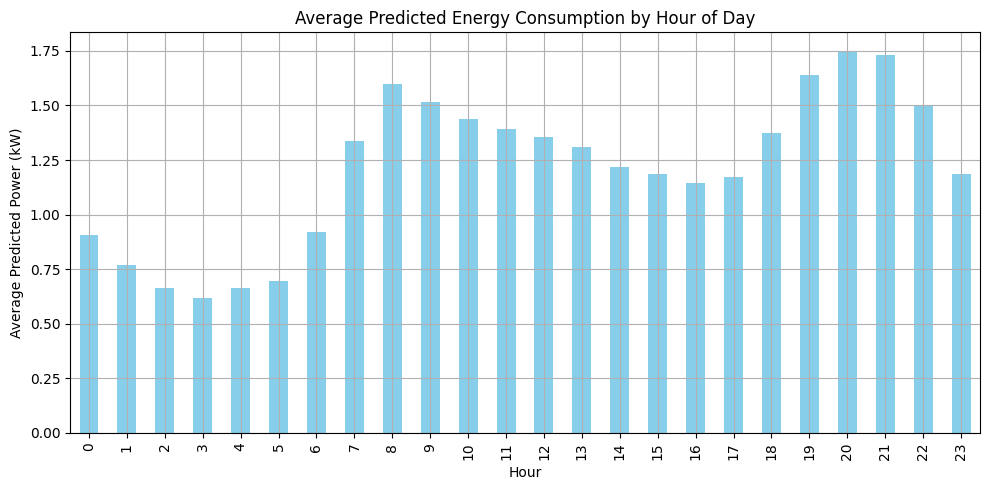

In [21]:
'''"This plot reveals the hours with highest average usage
guiding us when to avoid running heavy appliances or apply dynamic pricing.'''
# Add hour column
test_xgb['hour'] = test_xgb['Datetime'].dt.hour
test_xgb['predicted_power'] = y_pred_xgb

# Average consumption by hour
hourly_avg = test_xgb.groupby('hour')['predicted_power'].mean()

# Plot
plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Predicted Energy Consumption by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Predicted Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/575222137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_xgb['date'] = test_xgb['Datetime'].dt.date


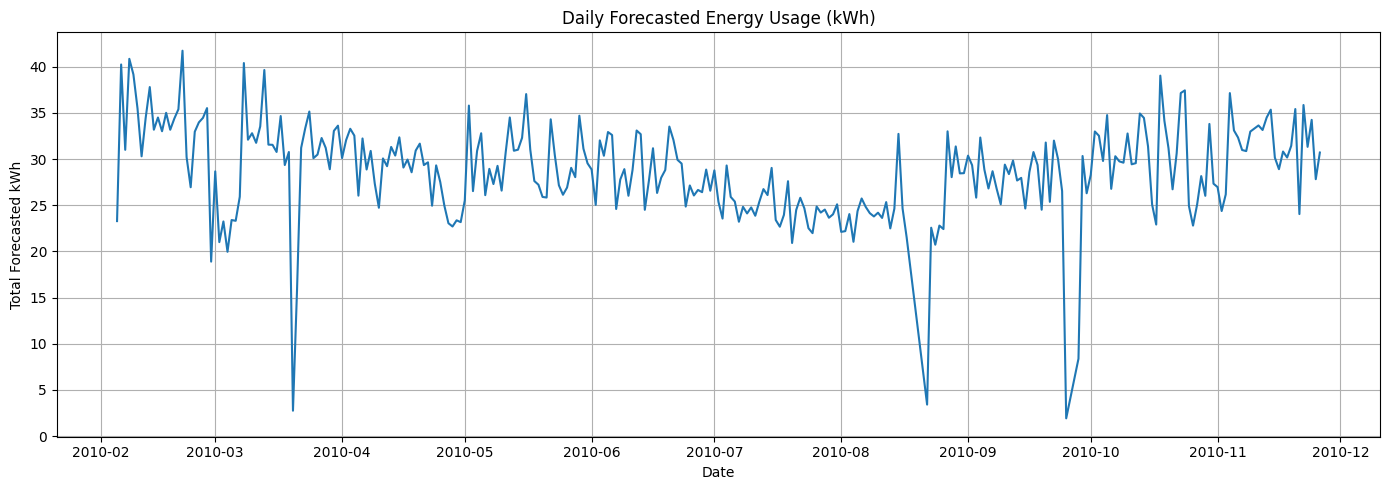

In [22]:
'''Knowing forecasted daily energy helps households plan 
energy-intensive activities on lower-use days or monitor budget thresholds.'''

test_xgb['date'] = test_xgb['Datetime'].dt.date
daily_forecast = test_xgb.groupby('date')['predicted_power'].sum()

# Plot
plt.figure(figsize=(14, 5))
daily_forecast.plot()
plt.title('Daily Forecasted Energy Usage (kWh)')
plt.xlabel('Date')
plt.ylabel('Total Forecasted kWh')
plt.grid(True)
plt.tight_layout()
plt.show()



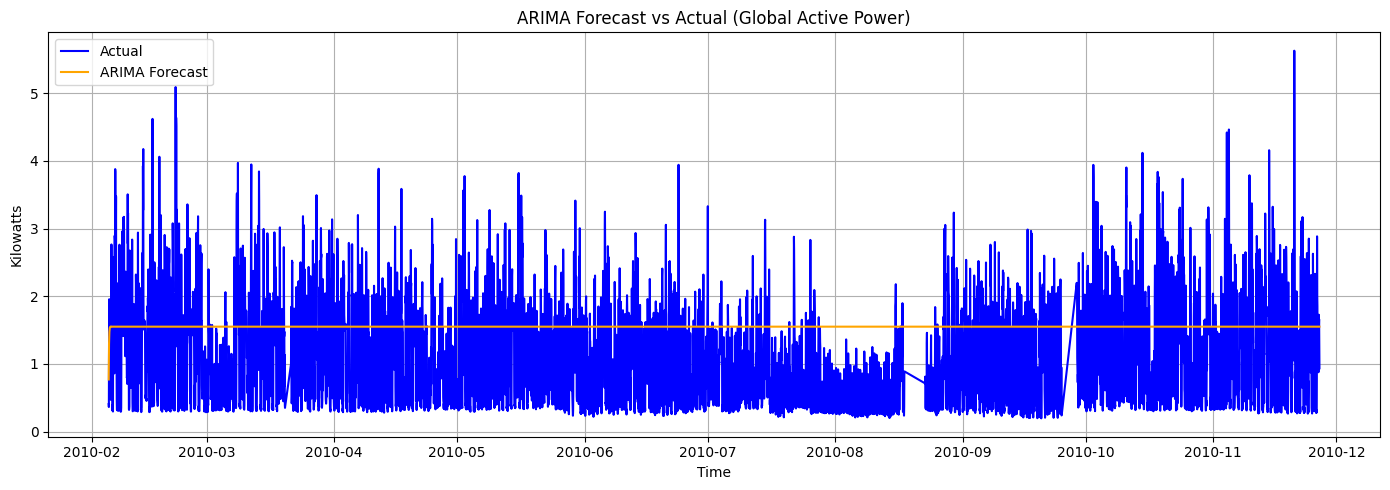

In [19]:
#AVOID AVOID
#SIMPLE ARIMA METHOD
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(test_hourly.index, test_hourly, label='Actual', color='blue')
plt.plot(test_hourly.index, forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual (Global Active Power)')
plt.xlabel('Time')
plt.ylabel('Kilowatts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#ARIMA RESULTS , to conclude XGBOOST was better
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_hourly, forecast)
mae = mean_absolute_error(test_hourly, forecast)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')


MSE: 0.8373
MAE: 0.7925
